In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Train

In [3]:
df = pd.read_csv('train.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


### Test

In [312]:
test = pd.read_csv('test.csv')
test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [313]:
test.drop("Price",axis=1,inplace=True)

In [314]:
test.drop("ID",axis=1,inplace=True)

In [315]:
test.replace(to_replace='-',value=np.nan,inplace=True)

In [316]:
test.isnull().sum()

Levy                2454
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

In [317]:
new_mileage_test = test.Mileage.str.split(" ",n=1,expand=True)
new_mileage_test

,0,1
0,0,km
1,26000,km
2,168000,km
3,143000,km
4,200000,km
...,...,...
8240,164000,km
8241,156000,km
8242,102907,km
8243,3000,km


In [318]:
test['Mileage'] = new_mileage_test[0]

In [319]:
eng_vol_test = test['Engine volume'].str.split(" ",n=1,expand=True)
test['Engine volume'] = eng_vol_test[0]
test['isTurbo'] = eng_vol_test[1]
test['isTurbo'] = test['isTurbo'].replace(to_replace=np.nan,value='Non-Turbo')

In [320]:
test.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,isTurbo
0,NaN,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0,0,4,Manual,Front,02-Mar,Left wheel,Grey,10,Turbo
1,NaN,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000,4,Tiptronic,Front,04-May,Left wheel,Grey,10,Non-Turbo
2,NaN,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,Non-Turbo
3,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000,6,Automatic,4x4,04-May,Left wheel,Blue,12,Non-Turbo
4,NaN,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000,4,Manual,Front,04-May,Left wheel,Black,0,Non-Turbo


In [321]:
test[["Levy","Mileage"]] = test[["Levy","Mileage"]].apply(pd.to_numeric)
test[["Engine volume", "Cylinders","Airbags"]] = test[["Engine volume", "Cylinders","Airbags"]].astype(object)

In [322]:
test.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,isTurbo
0,NaN,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0,0,4,Manual,Front,02-Mar,Left wheel,Grey,10,Turbo
1,NaN,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000,4,Tiptronic,Front,04-May,Left wheel,Grey,10,Non-Turbo
2,NaN,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,Non-Turbo
3,975.0,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000,6,Automatic,4x4,04-May,Left wheel,Blue,12,Non-Turbo
4,NaN,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000,4,Manual,Front,04-May,Left wheel,Black,0,Non-Turbo


In [324]:
test['Prod. year'] = test['Prod. year'].astype(object)

In [325]:
test_num = test.select_dtypes(exclude='object')
test_cat = test.select_dtypes(include='object')

In [326]:
test_cat

,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,isTurbo
0,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0,4,Manual,Front,02-Mar,Left wheel,Grey,10,Turbo
1,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,4,Tiptronic,Front,04-May,Left wheel,Grey,10,Non-Turbo
2,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,Non-Turbo
3,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,6,Automatic,4x4,04-May,Left wheel,Blue,12,Non-Turbo
4,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,4,Manual,Front,04-May,Left wheel,Black,0,Non-Turbo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,FIAT,Stilo,2004,Universal,No,Petrol,1.6,4,Manual,Front,04-May,Left wheel,Blue,6,Non-Turbo
8241,BMW,528 F10,2012,Sedan,Yes,Petrol,2.8,4,Tiptronic,Front,04-May,Left wheel,Black,6,Turbo
8242,LEXUS,GX 460,2015,Jeep,Yes,Petrol,4.6,8,Automatic,4x4,04-May,Left wheel,Black,0,Non-Turbo
8243,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,1.5,4,Automatic,Front,04-May,Left wheel,Green,4,Non-Turbo


In [327]:
test_num

,Levy,Mileage
0,NaN,0
1,NaN,26000
2,NaN,168000
3,975.0,143000
4,NaN,200000
...,...,...
8240,1357.0,164000
8241,NaN,156000
8242,1646.0,102907
8243,784.0,3000


### Submission

In [328]:
predictions = rand_for_model.predict(test)

In [329]:
sub = pd.read_csv('submission.csv')

In [330]:
sub['Price'] = predictions

In [331]:
sub.to_csv("Randforest01.csv")

## Exploring the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [7]:
df.duplicated().sum()

313

In [8]:
df.drop_duplicates(inplace=True,keep='first')

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [11]:
df.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [12]:
df.replace(to_replace='-',value=np.nan,inplace=True)

In [14]:
df.isnull().sum()

ID                     0
Price                  0
Levy                5709
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

<AxesSubplot:>

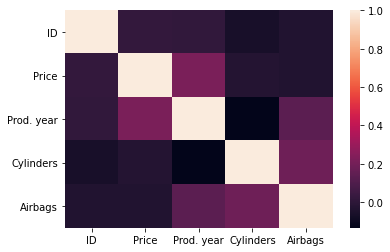

In [18]:
sns.heatmap(df.corr(method='kendall'))

In [19]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [27]:
new_mileage = df.Mileage.str.split(" ",n=1,expand=True)
new_mileage

,0,1
0,186005,km
1,192000,km
2,200000,km
3,168966,km
4,91901,km
...,...,...
19232,300000,km
19233,161600,km
19234,116365,km
19235,51258,km


In [28]:
df['Mileage'] = new_mileage[0]

In [36]:
eng_vol = df['Engine volume'].str.split(" ",n=1,expand=True)
eng_vol

,0,1
0,3.5,None
1,3,None
2,1.3,None
3,2.5,None
4,1.3,None
...,...,...
19232,2.0,Turbo
19233,2.4,None
19234,2,None
19235,2,None


In [37]:
df['Engine volume'] = eng_vol[0]

In [38]:
df['isTurbo'] = eng_vol[1]

In [39]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,isTurbo
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,None
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,None
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,None
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,None
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,None


In [40]:
df['isTurbo'] = df['isTurbo'].replace(to_replace=np.nan,value='Non-Turbo')

In [41]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,isTurbo
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,Non-Turbo
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,Non-Turbo
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,Non-Turbo
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,Non-Turbo
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,Non-Turbo


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              13215 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

In [48]:
df.nunique()

ID                  18924
Price                2315
Levy                  558
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume          65
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
isTurbo                 2
dtype: int64

In [45]:
df[["Levy","Mileage"]] = df[["Levy","Mileage"]].apply(pd.to_numeric)

In [52]:
df[["Engine volume", "Cylinders","Airbags"]] = df[["Engine volume", "Cylinders","Airbags"]].astype(object)

In [53]:
num = df.select_dtypes(exclude=object)
cat = df.select_dtypes(include=object)

In [54]:
num.head()

,ID,Price,Levy,Prod. year,Mileage
0,45654403,13328,1399.0,2010,186005
1,44731507,16621,1018.0,2011,192000
2,45774419,8467,NaN,2006,200000
3,45769185,3607,862.0,2011,168966
4,45809263,11726,446.0,2014,91901


In [47]:
cat.head()

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Doors,Wheel,Color,isTurbo
0,LEXUS,RX 450,Jeep,Yes,Hybrid,Automatic,4x4,04-May,Left wheel,Silver,Non-Turbo
1,CHEVROLET,Equinox,Jeep,No,Petrol,Tiptronic,4x4,04-May,Left wheel,Black,Non-Turbo
2,HONDA,FIT,Hatchback,No,Petrol,Variator,Front,04-May,Right-hand drive,Black,Non-Turbo
3,FORD,Escape,Jeep,Yes,Hybrid,Automatic,4x4,04-May,Left wheel,White,Non-Turbo
4,HONDA,FIT,Hatchback,Yes,Petrol,Automatic,Front,04-May,Left wheel,Silver,Non-Turbo


### Handling Outliers


In [67]:
def check_outliers(df):
    for i in df:
        sns.boxplot(x=df[i])
        plt.show()

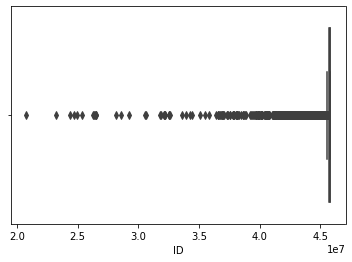

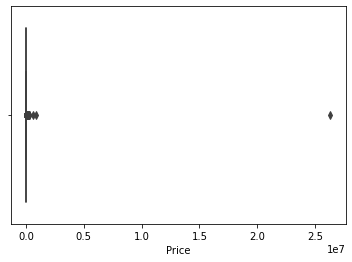

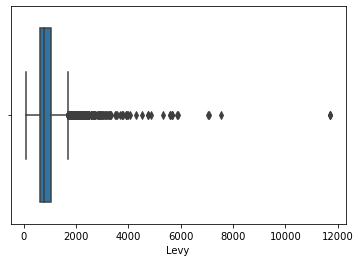

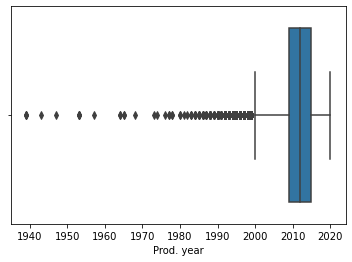

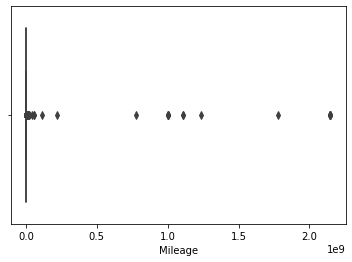

In [68]:
check_outliers(num)

In [72]:
## Since other variables cannot be capped we will only cap Mileage and Levy

def capp_outliers(df):
    
    for i in df:
        if i == 'Levy' or i == 'Mileage' or i == 'Price':
            q1 = df[i].quantile(0.25)
            q3 = df[i].quantile(0.75)
            
            iqr = q3-q1
            
            ub = q3+1.5*iqr
            lb = q1-1.5*iqr
            
            df[i] = np.where(df[i] > ub, ub,
                            np.where(df[i] < lb, lb,
                            df[i] ))
            
    return df
            
        


In [73]:
df1 = capp_outliers(df)

In [75]:
cat = df1.select_dtypes(include=object)
num = df1.select_dtypes(exclude=object)

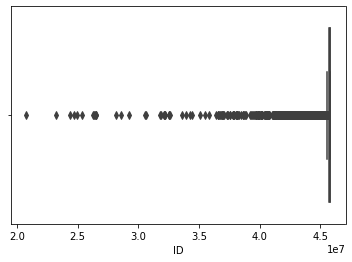

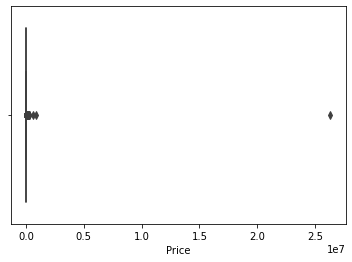

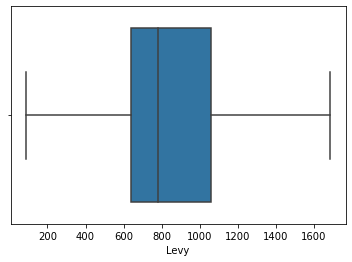

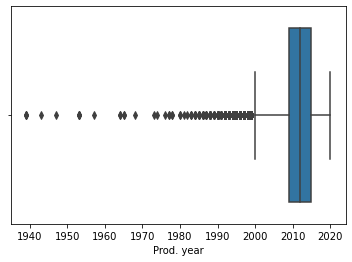

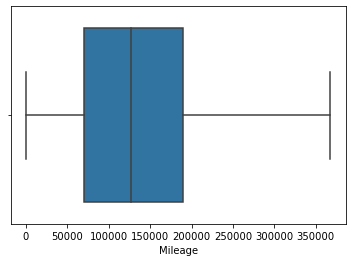

In [76]:
check_outliers(num)

In [86]:
num.head()

,ID,Price,Levy,Prod. year,Mileage
0,45654403,13328,1399.0,2010,186005.0
1,44731507,16621,1018.0,2011,192000.0
2,45774419,8467,NaN,2006,200000.0
3,45769185,3607,862.0,2011,168966.0
4,45809263,11726,446.0,2014,91901.0


In [87]:
cat.head()

,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,isTurbo
0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,Non-Turbo
1,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,Non-Turbo
2,HONDA,FIT,Hatchback,No,Petrol,1.3,4.0,Variator,Front,04-May,Right-hand drive,Black,2,Non-Turbo
3,FORD,Escape,Jeep,Yes,Hybrid,2.5,4.0,Automatic,4x4,04-May,Left wheel,White,0,Non-Turbo
4,HONDA,FIT,Hatchback,Yes,Petrol,1.3,4.0,Automatic,Front,04-May,Left wheel,Silver,4,Non-Turbo


In [89]:
df1[["Engine volume", "Cylinders","Airbags","Prod. year"]] = df1[["Engine volume", "Cylinders","Airbags","Prod. year"]].astype(object)

In [270]:
df1.drop("ID",axis=1,inplace=True)

In [271]:
cat = df1.select_dtypes(include=object)
num = df1.select_dtypes(exclude=object)

In [280]:
df1.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,isTurbo
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,Non-Turbo
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,Non-Turbo
2,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2,Non-Turbo
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0,Non-Turbo
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4,Non-Turbo


In [287]:
cat.head()

,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,isTurbo
0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,Non-Turbo
1,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,Non-Turbo
2,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,4.0,Variator,Front,04-May,Right-hand drive,Black,2,Non-Turbo
3,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,4.0,Automatic,4x4,04-May,Left wheel,White,0,Non-Turbo
4,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,4.0,Automatic,Front,04-May,Left wheel,Silver,4,Non-Turbo


### Splitting

In [284]:
X = df1.drop("Price",axis=1)
y = df1.Price

In [285]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [286]:
X_train.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,isTurbo
8727,639.0,HYUNDAI,Santa FE,2014,Jeep,Yes,Diesel,2.0,151000.0,4.0,Automatic,Front,04-May,Left wheel,Black,4,Non-Turbo
4808,1685.0,LEXUS,GX 460,2010,Jeep,Yes,Petrol,4.6,260771.0,8.0,Automatic,4x4,04-May,Left wheel,Black,0,Non-Turbo
579,NaN,MERCEDES-BENZ,ML 550 4.7,2012,Jeep,Yes,Petrol,4.7,167000.0,8.0,Tiptronic,4x4,04-May,Left wheel,Black,10,Turbo
8139,1185.0,SUBARU,Forester,2009,Jeep,No,Petrol,2.5,115000.0,6.0,Automatic,4x4,04-May,Left wheel,Black,12,Non-Turbo
6554,900.0,HYUNDAI,Santa FE,2015,Jeep,Yes,Petrol,2.4,107106.0,4.0,Automatic,Front,04-May,Left wheel,White,12,Non-Turbo


### Building Pipelines

In [306]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.impute import KNNImputer,SimpleImputer,MissingIndicator
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor

In [283]:
# imputation 

trf1 = ColumnTransformer(transformers=[
    ('impute_levy',KNNImputer(),[0]),
],remainder='passthrough')

In [288]:
# one hot encoding

trf2 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,3,4,5,6,7,9,10,11,12,13,14,15,16])
],remainder='passthrough')

In [289]:
# scaling

trf3 = ColumnTransformer(transformers=[
    ('scale',StandardScaler(),[0,8])
],remainder='passthrough')

In [291]:
#model

trf4 = RandomForestRegressor()

#### Pipeline

In [297]:
pipes= Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4)
])

### Another Pipeline

In [332]:
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
scaler = StandardScaler()
knn = KNNImputer(n_neighbors=5)
rfr = RandomForestRegressor(n_estimators=1000)

In [302]:
### Numeric Transformer 
num_trf = Pipeline(steps=[
    ('knn',knn),
    ('scaler',scaler)
])

### Categorical Transformer 
cat_trf = Pipeline(steps=[
    ('ohe',ohe)
])

In [303]:
preprocessing = ColumnTransformer(transformers=[
    
    ('nums',num_trf,selector(dtype_exclude='object')),
    ('cats',cat_trf,selector(dtype_include='object'))            
    
],remainder='passthrough')

In [304]:
pipe = Pipeline(steps=[
    ('pp',preprocessing),
    ('rfr',rfr)
])

In [305]:
rand_for_model = pipe.fit(X_train,y_train)

In [308]:
y_pred_rand = rand_for_model.predict(X_test)


In [309]:
rmse = math.sqrt(mean_squared_error(y_test,y_pred_rand))
rmse

10860.706089333102